In [1]:
import tensorflow as tf
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os
import pandas as pd
import h5py
from keras.preprocessing import image as keras_image
from sklearn.model_selection import train_test_split
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Activation, Flatten, MaxPooling2D

Using TensorFlow backend.


In [2]:
#import image
datadir1 = "/home/sabu/handwriting recognition/save_images_lines"

image = cv2.imread('mnist_image.png',cv2.IMREAD_GRAYSCALE)
# gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
gray = image
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
list_images = []


kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(thresh, kernel, iterations=1) #or use erode
im2,ctrs, hier = cv2.findContours(img_dilation.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi = image[y:y+h, x:x+w]
    NAME = "seg_{}.jpg".format(int(time.time()))
    temp = os.path.join(datadir1,NAME)
    cv2.imwrite(os.path.join(datadir1,"seg_{}.jpg".format(int(time.time()))),roi)
    new_array = cv2.resize(roi,(28,28))
    list_images.append(new_array)
    cv2.imshow('segment no:'+str(ctr),roi)
#     cv2.imwrite(os.path.join(datadir1,"seg_{}.jpg".format(int(time.time()))),roi)
    cv2.rectangle(image,(x,y),( x + w, y + h ),(90,0,255),2)
    cv2.waitKey(1000)

cv2.imshow('Segmented image',image)
cv2.waitKey(1000)
cv2.destroyAllWindows()

In [5]:
len(list_images)

16

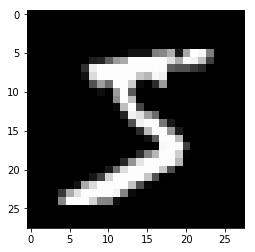

In [16]:
mnist = tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
plt.imshow(x_train[0],cmap="gray")
plt.show()

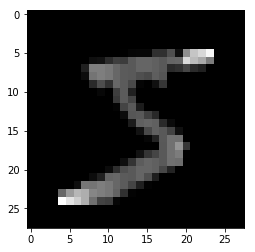

In [17]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
x_train.shape
plt.imshow(x_train[0],cmap="gray")
plt.show()

In [23]:
model = tf.keras.models.Sequential() #for the feed-forward network
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation= tf.nn.softmax))
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=5,validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 5s 94us/step - loss: 0.2762 - acc: 0.9191 - val_loss: 0.1424 - val_acc: 0.9590
Epoch 2/5
54000/54000 [==============================] - 5s 87us/step - loss: 0.1129 - acc: 0.9652 - val_loss: 0.0890 - val_acc: 0.9723
Epoch 3/5
54000/54000 [==============================] - 5s 93us/step - loss: 0.0775 - acc: 0.9760 - val_loss: 0.0984 - val_acc: 0.9687
Epoch 4/5
54000/54000 [==============================] - 5s 90us/step - loss: 0.0562 - acc: 0.9818 - val_loss: 0.0978 - val_acc: 0.9713
Epoch 5/5
54000/54000 [==============================] - 5s 92us/step - loss: 0.0423 - acc: 0.9861 - val_loss: 0.0845 - val_acc: 0.9772


In [26]:
list_images = np.array(list_images).reshape(-1,28,28)
print(list_images.shape)

(16, 28, 28)


In [27]:
predictions = model.predict([list_images])

In [28]:
print(predictions)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


In [33]:
print(np.argmax(predictions[0]))

5


In [6]:
data1 = pd.read_csv("../Downloads/classification-of-handwritten-letters/letters.csv")
letters1 = data1['letter']
data2 = pd.read_csv("../Downloads/classification-of-handwritten-letters/letters2.csv")
letters2 = data2['letter']
data3 = pd.read_csv("../Downloads/classification-of-handwritten-letters/letters3.csv")
letters3 = data3['letter']

In [9]:
letters = pd.concat((letters1, letters2), axis=0, ignore_index=True)
letters = pd.concat((letters, letters3), axis=0, ignore_index=True)
# letters = letters[:n]
len(letters)

14190

In [10]:
f = h5py.File('../Downloads/classification-of-handwritten-letters/LetterColorImages_123.h5', 'r')
# List all groups
keys = list(f.keys())
keys 

['backgrounds', 'images', 'labels']

In [35]:
backgrounds = np.array(f[keys[0]])
images = np.array(f[keys[1]])
targets = np.array(f[keys[2]])

In [36]:
print(images.shape)
print(set(targets))

(14190, 32, 32, 3)
{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33}


In [38]:
cat_targets = tf.keras.utils.to_categorical(np.array(targets-1), 33)
cat_targets.shape

(14190, 33)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(images, cat_targets,  test_size = 0.2, random_state = 1)
n = int(len(x_test)/2)
x_valid, y_valid = x_test[:n], y_test[:n]
x_test, y_test = x_test[n:], y_test[n:]

In [46]:
print(x_train.shape, x_valid.shape, x_test.shape)
print(y_train.shape, y_valid.shape, y_test.shape)

(11352, 32, 32, 3) (1419, 32, 32, 3) (1419, 32, 32, 3)
(11352, 33) (1419, 33) (1419, 33)


In [ ]:
del cat_targets images targets background